## 读取数据
- jupyter最好不要打印太多的数据，不然会崩溃=.=

In [78]:
import os
import json
# 其中的部分数据
filename = 'data2/7th801.json'
data = open(filename, encoding='utf-8')
strJson1 = json.load(data)

In [4]:
# 所有数据3500余个用户的关注关系
filename_act = 'total_data.json'
actualdata = open(filename_act,encoding = 'utf-8')
strJson = json.load(actualdata)

In [20]:
def get_html(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36",
        "Referer": "https://weibo.com"
    }
    cookies = {
        'cookie':'SINAGLOBAL=4954692280506.27.1591184066784; UOR=,,www.baidu.com; ULV=1644499064874:67:1:1:326185633315.2391.1644499064716:1641877820203; SCF=Au_QDngCAtZdjo2U3MOWDe9AqNjD2bv9bCKkhre3FM48LY3O7EhT4bA4ce4nvljdCdv6en1V_hLuqlAhoRV6tW4.; SUB=_2A25PJqE-DeRhGeVO6VQV8irKyzmIHXVsVZX2rDV8PUNbmtB-LRKkkW9NTWqL0EvkIg3UXyDrNn5JSh98OJfNZmeS; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WFd.fwHbnebHoYw4M0SwxAm5JpX5KzhUgL.Foe7eoqXeoBceh-2dJLoI7__UgSQIs8DMJxRwntt; ALF=1677985006; SSOLoginState=1646449006'
        #'cookie':'SINAGLOBAL=4954692280506.27.1591184066784; UOR=,,www.baidu.com; ULV=1640670361949:63:14:1:8632450552135.697.1640670361940:1639835996800; SCF=Au_QDngCAtZdjo2U3MOWDe9AqNjD2bv9bCKkhre3FM48Gh6mDFxMCacqDmefa19z_7fYJ9W_ldjCbGt1vKO7CaI.; SUB=_2A25Mz7rVDeRhGeVO6VQV8irKyzmIHXVvvKsdrDV8PUJbmtAKLRn-kW9NTWqL0FkKERyR5ZWAAhKgqSgGF5QPtnkp; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9WFd.fwHbnebHoYw4M0SwxAm5JpX5K-hUgL.Foe7eoqXeoBceh-2dJLoI7__UgSQIs8DMJxRwntt; ALF=1672280760; SSOLoginState=1640745605; XSRF-TOKEN=8rdPjDQ-y5jyz0mWRw5ZLY24'
    }
    response = requests.get(url, headers=headers, cookies=cookies)
    time.sleep(3)   # 加上5s 的延时防止被反爬
    return response.text

## 画图

In [27]:
import requests
import time
import re

In [67]:
def get_username(userid):
    url = 'https://www.weibo.com/u/' + userid
    text = get_html(url)
    pattern = r'screen_name":"(.*?)"'
    result = re.findall(pattern,text)
    username = result[0]
    return username

In [71]:
for m in strJson1['5950067614']['fans']:
    if m in strJson1['5950067614']['followers']:

        print(m['id'])

5652904379
6820573088
6974172580
6376227232
6991371982
5241816082
5362383141
5453641885
3828341374
7050346416
6088362873
3838244589
3291874994
5346668643
6453039668
5846277731
2140884144
5867754459
5716269568
6778246821
5384882999
6626865763
5191851879
5147818810
2384587023
3885166990


In [16]:
import networkx as nx  
G=nx.Graph()
a = 'xy'
b = 'o'
aa = (a,b)
G.add_edges_from([aa])

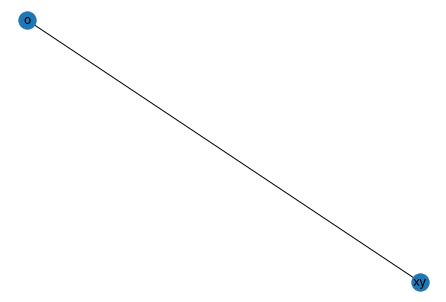

In [17]:
nx.draw(G,with_labels=True) 
import matplotlib.pyplot as plt #画图以及图片展示的包以及语句
plt.show()

## 生成邻接矩阵(adjacency matrix)


如果采用所有3576个用户的数据，去构成网络，一共涉及到的用户总量就会达到795984，没办法顺利构建邻接矩阵。

### 所以，有两种解决方案：

1. 采用部分数据（比较合适的也是低于100个用户的关系数据）
2. 放弃有向图的分析，即若两个人相互关注才构成连接。

In [69]:
len(strJson)

3576

### 获取所有的总数

In [77]:
list_all = []
for i in strJson:
    list_all.append(i)
    for m in strJson[i]['fans']:
        list_all.append(m['id'])
    for n  in strJson[i]['followers']:
        list_all.append(n['id'])
list_actualall = set(list_all)
len(list_actualall)

795984

### 获取有双向关系的总数

In [95]:
list_all = []
for i in strJson1:
    list_all.append(i)
    for m in strJson1[i]['fans']:
        if m in strJson1[i]['followers']:
            list_all.append(str(m['id']))
set_actualall = set(list_all)

list_actualall = list(set_actualall)
len(list_actualall)

41957

In [96]:
list_actualall[0:5]

['7116267831', '6071723614', '6186171569', '6901333283', '5856871044']

In [104]:
def get_index(id):
    p = list_actualall.index(id)
    return p

In [88]:
list_links = []
for i in strJson1:
    for m in strJson1[i]['fans']:
        if m in strJson1[i]['followers']:
            link = (i,str(m['id']))
            list_links.append(link)
set_actuallink = set(list_links)
len(set_actuallink)

47367

In [105]:
import numpy as np
# 构建一个全为0的矩阵
A_matrix = np.zeros((len(set_actuallink),len(set_actuallink)))

In [107]:
for i in strJson1:
    index_i = get_index(i)
    for m in strJson1[i]['fans']:
        if m in strJson1[i]['followers']:
            index_m = get_index(str(m['id']))
            A_matrix[index_i][index_m] = 1
            A_matrix[index_m][index_i] = 1

In [108]:
A_matrix[2:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#转化成louvain算法比较好实现的txt格式


## Louvain 算法

In [110]:
# coding=utf-8
import collections
import random

def load_graph(path):
    G = collections.defaultdict(dict)
    with open(path) as text:
        for line in text:
            vertices = line.strip().split()
            v_i = int(vertices[0])
            v_j = int(vertices[1])
            w = float(vertices[2])
            G[v_i][v_j] = w
            G[v_j][v_i] = w
    return G

def load_graph1(matrix):
    return matrix

class Vertex():
    def __init__(self, vid, cid, nodes, k_in=0):
        self._vid = vid
        self._cid = cid
        self._nodes = nodes
        self._kin = k_in  # 结点内部的边的权重

class Louvain():
    def __init__(self, G):
        self._G = G
        self._m = 0  # 边数量
        self._cid_vertices = {}  # 需维护的关于社区的信息(社区编号,其中包含的结点编号的集合)
        self._vid_vertex = {}  # 需维护的关于结点的信息(结点编号，相应的Vertex实例)
        for vid in self._G.keys():
            self._cid_vertices[vid] = set([vid])
            self._vid_vertex[vid] = Vertex(vid, vid, set([vid]))
            self._m += sum([1 for neighbor in self._G[vid].keys() if neighbor > vid])

    def first_stage(self):
        mod_inc = False  # 用于判断算法是否可终止
        visit_sequence = self._G.keys()
        random.shuffle(list(visit_sequence))
        while True:
            can_stop = True  # 第一阶段是否可终止
            for v_vid in visit_sequence:
                v_cid = self._vid_vertex[v_vid]._cid
                k_v = sum(self._G[v_vid].values()) + self._vid_vertex[v_vid]._kin
                cid_Q = {}
                for w_vid in self._G[v_vid].keys():
                    w_cid = self._vid_vertex[w_vid]._cid
                    if w_cid in cid_Q:
                        continue
                    else:
                        tot = sum(
                            [sum(self._G[k].values()) + self._vid_vertex[k]._kin for k in self._cid_vertices[w_cid]])
                        if w_cid == v_cid:
                            tot -= k_v
                        k_v_in = sum([v for k, v in self._G[v_vid].items() if k in self._cid_vertices[w_cid]])
                        delta_Q = k_v_in - k_v * tot / self._m  # 由于只需要知道delta_Q的正负，所以少乘了1/(2*self._m)
                        cid_Q[w_cid] = delta_Q

                cid, max_delta_Q = sorted(cid_Q.items(), key=lambda item: item[1], reverse=True)[0]
                if max_delta_Q > 0.0 and cid != v_cid:
                    self._vid_vertex[v_vid]._cid = cid
                    self._cid_vertices[cid].add(v_vid)
                    self._cid_vertices[v_cid].remove(v_vid)
                    can_stop = False
                    mod_inc = True
            if can_stop:
                break
        return mod_inc

    def second_stage(self):
        cid_vertices = {}
        vid_vertex = {}
        for cid, vertices in self._cid_vertices.items():
            if len(vertices) == 0:
                continue
            new_vertex = Vertex(cid, cid, set())
            for vid in vertices:
                new_vertex._nodes.update(self._vid_vertex[vid]._nodes)
                new_vertex._kin += self._vid_vertex[vid]._kin
                for k, v in self._G[vid].items():
                    if k in vertices:
                        new_vertex._kin += v / 2.0
            cid_vertices[cid] = set([cid])
            vid_vertex[cid] = new_vertex

        G = collections.defaultdict(dict)
        for cid1, vertices1 in self._cid_vertices.items():
            if len(vertices1) == 0:
                continue
            for cid2, vertices2 in self._cid_vertices.items():
                if cid2 <= cid1 or len(vertices2) == 0:
                    continue
                edge_weight = 0.0
                for vid in vertices1:
                    for k, v in self._G[vid].items():
                        if k in vertices2:
                            edge_weight += v
                if edge_weight != 0:
                    G[cid1][cid2] = edge_weight
                    G[cid2][cid1] = edge_weight

        self._cid_vertices = cid_vertices
        self._vid_vertex = vid_vertex
        self._G = G

    def get_communities(self):
        communities = []
        for vertices in self._cid_vertices.values():
            if len(vertices) != 0:
                c = set()
                for vid in vertices:
                    c.update(self._vid_vertex[vid]._nodes)
                communities.append(c)
        return communities

    def execute(self):
        iter_time = 1
        while True:
            iter_time += 1
            mod_inc = self.first_stage()
            if mod_inc:
                self.second_stage()
            else:
                break
        return self.get_communities()

if __name__ == '__main__':
    G = load_graph1(A_matrix)
    algorithm = Louvain(G)
    communities = algorithm.execute()
    # 按照社区大小从大到小排序输出
    communities = sorted(communities, key=lambda b: -len(b)) # 按社区大小排序
    count = 0
    for communitie in communities:
        count += 1
        print("社区", count, " ", communitie)


AttributeError: 'numpy.ndarray' object has no attribute 'keys'